# SVM Math Task In-Depth (Final)
Written by Theodore Nguyen

The goal of this notebook is to dig deeper into the math and concept behind linear support vector machines (linear SVM).

A plethora of functions have been created with the intention to 

1. Encourage engagement with the program and Python code
2. Visualize the step-by-step production of a linear SVM

As a note, the mathematical concepts behind this notebook differ from the slides in class. However, the written-up explanation of the SVM math task remains true to the math in the slides.

The mathematics in this notebook **do not** use concepts in Linear Algebra and Multivariable Calculus (e.g. maximization/optimization in two variables). They only use concepts from Algebra, specifically lines (since we're talking about linear SVM).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Functions

All functions have documentation as well as comments. I encourage you to analyze the code **after** running everything and playing around with the program *as a whole*. The point of this notebook is to understand linear SVMs **first**, and then the Python code afterwards.

So, with that said, go ahead and run all of these functions. I'll meet you down below at the heading titled **Inputting Data**.

### Data Input Function (user input)

In [2]:
def data_input(Class):
    """
    Asks the user to input data points: 
    first x-coordinates, then y-coordinates.
    
    Parameters
    ----------
    Class : int, Class number
    
    Returns
    ----------
    (x_coords, y_coords) : tuple of lists
        x_coords : list, x-coordinates of Class
        y_coords : list, y-coordinates of Class
    """
    
    # two lists to hold x and y coordinates
    x_coords = []
    y_coords = []

    print('Inputting x-coords for class ' + str(Class) + ' ...')

    while True: # keep on asking for x-coords until user types done
        try:
            # user input for one x-coordinate
            x = input('Input x-coord (enter done when finished): ')
            if x == 'done': # if user types done, exit out of loop
                break
            # turn user input into a float and append to x_coords
            x_coords.append(float(x))
        # the user could have inputted a non-number,
        # so raise a ValueError
        except ValueError:
            print('Invalid. Input a number.')

    # print out x_coords
    print('\n\t\tx-coords: ', str(x_coords), '\n')
    print('Inputting y-coords for class ' + str(Class) + ' ...')

    # do the same for y-coords
    while True:
        try:
            y = input('Input y-coord (enter done when finished): ')
            if y == 'done':
                break
            y_coords.append(float(y))
        except ValueError:
            print('Invalid. Input a number.')

    print('\n\t\ty-coords: ', str(y_coords), '\n')

    # the user could have inputted more x coords than y coords (or vice versa)
    # so raise an IndexError
    if len(x_coords) != len(y_coords):
        raise IndexError('Make sure your x-coords and y-coords match up! Try again.')

    return (x_coords, y_coords)

### Data Input Function (.csv file)

In [3]:
def data_input_csv(data, Class):
    """
    Extracts data points from dataset according to Class
    
    Parameters
    ----------
    data  : str, name of csv file (include .csv)
    Class : int, Class number
    
    Returns
    ----------
    (x_coords, y_coords) : tuple of lists
        x_coords : list, x-coordinates of Class
        y_coords : list, y-coordinates of Class
    """
    
    # read in data
    df = pd.read_csv(data)
    
    # two lists to hold x and y coordinates
    x_coords = list(df[(df['class'] == Class)]['x'])
    y_coords = list(df[(df['class'] == Class)]['y'])
    
    print('x-coords: ', str(x_coords))
    print('y-coords: ', str(y_coords))
    
    return (x_coords, y_coords)

### Data Points Plot Function

In [4]:
def data_plot(c1x, c1y, c2x, c2y):
    """
    Plots a scatterplot of data points,
    and retains class distinction
    
    Parameters
    ----------
    c1x : list, x-coordinates of class 1 (-1)
    c1y : list, y-coordinates of class 1 (-1)
    c2x : list, x-coordinates of class 2 (+1)
    c2y : list, y-coordinates of class 2 (+1)
    
    Returns
    ----------
    """
    
    # scatterplot of class 1 (-1)
    ax.scatter(c1x, c1y, label = r'Class $-1$', c = 'red', s = 200)
    # scatterplot of class 2 (+1)
    ax.scatter(c2x, c2y, label = r'Class $+1$', c = 'blue',s = 200)

    # min/max x/y values of entire data set
    min_x = min(min(c1x), min(c2x))
    max_x = max(max(c1x), max(c2x))
    min_y = min(min(c1y), min(c2y))
    max_y = max(max(c1y), max(c2y))
    
    # set xlabel, ylabel, and title of figure
    ax.set(xlabel = 'x', ylabel = 'y', title = 'Data Points',
        xlim = (min_x - 2, max_x + 2),
        ylim = (min_y - 2, max_y + 2))

    # include legend
    ax.legend()
    
    return

### Shortest Distance Function

In [5]:
def best_support_vectors(c1x, c1y, c2x, c2y):
    """
    Finds the best support vector for each class.
    The best support vectors are the two that
    are closest to each other.
    
    Parameters
    ----------
    c1x : list, x-coordinates of class 1 (-1)
    c1y : list, y-coordinates of class 1 (-1)
    c2x : list, x-coordinates of class 2 (+1)
    c2y : list, y-coordinates of class 2 (+1)
    
    Returns
    ----------
    (best_sv1, best_sv2) : tuple of tuples
        best_sv1         : tuple, (x-coord, y-coord) from class 1 (-1)
        best_sv2         : tuple, (x-coord, y-coord) from class 2 (+1)
    """
    
    # let the shortest distance be a really large number
    # anything shorter than this will be reassigned to shortest
    shortest = np.inf
    
    # outer loop loops through data points in class 1 (-1)
    for i in range(len(c1x)):
        # inner loop loops through data points in class 2 (+1)
        for j in range(len(c2x)):
            # calculate distance between two points using
            # distance formula (derived from Pythagorean Theorem)
            distance = np.sqrt((c1x[i] - c2x[j])**2 + (c1y[i] - c2y[j])**2)

            # if we calculate a distance that's shorter than the shortest,
            # reassign such distance to be the shortest
            if (distance < shortest):
                shortest = distance

                # also keep track of the two data points that
                # gave us the shortest distance
                best_sv1 = (c1x[i], c1y[i])
                best_sv2 = (c2x[j], c2y[j])

    print('Shortest distance: ', shortest)
    print('Support Vector for class -1: ', best_sv1)
    print('Support Vector for class +1: ', best_sv2)

    return (best_sv1, best_sv2)

### Distances Plot Function

In [6]:
def plot_distances(c1x, c1y, c2x, c2y, sv1, sv2):
    """
    Plots all the distances from class 1 (-1) to class 2 (+1)
    
    Parameters
    ----------
    c1x      : list, x-coordinates of class 1 (-1)
    c1y      : list, y-coordinates of class 1 (-1)
    c2x      : list, x-coordinates of class 2 (+1)
    c2y      : list, y-coordinates of class 2 (+1)
    sv1      : tuple, (x,y) support vector of class 1 (-1)
    sv2      : tuple, (x,y) support vector of class 2 (+1)
    
    Returns
    ----------
    """
    
    # scatter plots
    ax.scatter(c1x, c1y, label = r'Class $-1$', c = 'red', s = 200)
    ax.scatter(c2x, c2y, label = r'Class $+1$', c = 'blue',s = 200)

    # loop through class 1 (-1)
    for i in range(len(c1x)):
        # loop through class 2 (+1)
        for j in range(len(c2x)):
            # dotted line plot from a point in class 1 (-1)
            # to a point in class 2 (+1)
            ax.plot([c1x[i], c2x[j]], [c1y[i], c2y[j]], 
                    c = 'black', alpha = 0.7, ls = ':')

    # solid line plot from sv1 (-1) to sv2 (+1)
    # [0] index of tuple corresponds to x-coordinate
    # [1] index of tuple corresponds to y-coordinate
    ax.plot([sv1[0], sv2[0]], [sv1[1], sv2[1]],
            c = 'black', lw = 3, label = 'Shortest Distance')

    # min/max x/y values of entire data set
    min_x = min(min(c1x), min(c2x))
    max_x = max(max(c1x), max(c2x))
    min_y = min(min(c1y), min(c2y))
    max_y = max(max(c1y), max(c2y))
    
    # labels, title, and legend
    ax.set(xlabel = 'x',
        ylabel = 'y',
        title = 'Data Points with Distances',
        xlim = (min_x - 2, max_x + 2),
        ylim = (min_y - 2, max_y + 2))
    ax.legend()
    
    return

### $a$ and $b$ Calculator Function
* Calculates $a$ and $b$ of decision boundary line: $ax + by = c$

In [7]:
def find_a_and_b(sv1, sv2):
    """
    Calculates a and b values of decision boundary line,
    which is of the standard form:
    ax + by = c
    
    Parameters
    ----------
    sv1 : tuple, (x,y) support vector of class 1 (-1)
    sv2 : tuple, (x,y) support vector of class 2 (+1)
    
    Returns
    ----------
    (a, b) : tuple
        a  : float, change in x of support vectors
        b  : float, change in y of support vectors
    """
    
    # [0] index of tuple corresponds to x-coordinate
    # [1] index of tuple corresponds to y-coordinate
    a = sv2[0] - sv1[0]
    b = sv2[1] - sv1[1]

    print('Slope of line connecting support vectors: ', b/a)
    print('Slope of decision boundary line: ', -a/b)
    print('a: ', a)
    print('b: ', b)

    return (a, b)

### Midpoint Function

In [8]:
def midpoint(sv1, sv2):
    """
    Calculates the midpoint between two support vectors
    
    Parameters
    ----------
    sv1 : tuple, (x,y) support vector of class 1 (-1)
    sv2 : tuple, (x,y) support vector of class 2 (+1)
    
    Returns
    ----------
    (mid_x, mid_y) : tuple
        mid_x : float, x-coordinate of midpoint
        mid_y : float, y-coordinate of midpoint
    """
    
    # average of x-coordinates
    mid_x = (sv1[0] + sv2[0])/2
    # average of y-coordinates
    mid_y = (sv1[1] + sv2[1])/2

    print('Midpoint of the line connecting support vectors: ' 
          + '(' + str(mid_x) + ', ' + str(mid_y) + ')')

    return (mid_x, mid_y)

### $c$ Calculator Function
* Calculates $c$ of decision boundary line: $ax + by = c$

In [9]:
def find_c(a, b, x, y):
    c = a*x + b*y
    print('Value of c: ', c)
    return c

### Optimal Decision Boundary Plot Function

In [10]:
def optimal_decision_boundary(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c):
    """
    Plots the optimal decision boundary line for
    class 1 (-1) and class 2 (+1)
    
    Parameters
    ----------
    c1x      : list, x-coordinates of class 1 (-1)
    c1y      : list, y-coordinates of class 1 (-1)
    c2x      : list, x-coordinates of class 2 (+1)
    c2y      : list, y-coordinates of class 2 (+1)
    sv1      : tuple, (x,y) support vector of class 1 (-1)
    sv2      : tuple, (x,y) support vector of class 2 (+1)
    a        : float, ax + by = c
    b        : float, ax + by = c
    c        : float, ax + by = c
    
    Returns
    ----------
    """
    
    # scatterplots
    ax.scatter(sv1[0], sv1[1], label = r'Support Vector for Class $-1$',
        c = 'red', s = 250)
    ax.scatter(sv2[0], sv2[1], label = r'Support Vector for Class $+1$',
        c = 'blue', s = 250)
    ax.scatter(c1x, c1y,
        label = r'Class $-1$',
        c = 'red', alpha = 0.3, s = 200)
    ax.scatter(c2x, c2y,
        label = r'Class $+1$',
        c = 'blue', alpha = 0.3, s = 200)
    
    # line plot connecting support vectors
    ax.plot([sv1[0], sv2[0]], [sv1[1], sv2[1]],
        c = 'black', lw = 3, label = 'Shortest Distance')
    
    # min/max x/y values of entire data set
    min_x = min(min(c1x), min(c2x))
    max_x = max(max(c1x), max(c2x))
    min_y = min(min(c1y), min(c2y))
    max_y = max(max(c1y), max(c2y))

    # optimal decision boundary line
    x = np.linspace(min_x-10, max_x+10, 1000)
    y = (-a/b)*x + c/b
    ax.plot(x, y, c = 'cyan', lw = 3, 
            label = 'y = ' + str(-a/b) + 'x + ' + str(c/b))
    
    # labels, title, axes limits, and legend
    ax.set(xlabel = 'x', ylabel = 'y', title = 'Optimal Decision Boundary Line',
        xlim = (min_x - 2, max_x + 2),
        ylim = (min_y - 2, max_y + 2))
    ax.legend()

    return

### f Calculator Function
* Calculates $f$ of parallel hyperplanes:
    
    * $ax + by = c - f$
    * $ax + by = c + f$

In [11]:
def find_f(a, b, c, sv, Class):
    """
    Calculates f of parallel hyperplanes,
    which are of the forms:
    ax + by = c - f for class 1 (-1)
    ax + by = c + f for class 2 (+1)
    
    Parameters
    ----------
    a        : float, ax + by = c
    b        : float, ax + by = c
    c        : float, ax + by = c
    sv       : tuple, (x,y) support vector
    Class    : int, -1 for class (-1) and 1 for class (+1)
    
    Returns
    ----------
    f : float
    """
    
    # notice that f is isolated from the mathematical formulas
    if Class == -1:
        f = -a*sv[0] - b*sv[1] + c
    if Class == 1:
        f = a*sv[0] + b*sv[1] - c

    print('Value of f:', f)
    return f

### SVM Plot Function

In [12]:
def svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f):
    """
    Plots data points, optimal decision boundary line, and
    parallel hyperplanes
    
    Parameters
    ----------
    c1x      : list, x-coordinates of class 1 (-1)
    c1y      : list, y-coordinates of class 1 (-1)
    c2x      : list, x-coordinates of class 2 (+1)
    c2y      : list, y-coordinates of class 2 (+1)
    sv1      : tuple, (x,y) support vector of class 1 (-1)
    sv2      : tuple, (x,y) support vector of class 2 (+1)
    a        : float, ax + by = c
    b        : float, ax + by = c
    c        : float, ax + by = c
    f        : float, ax + by = c - f or ax + by = c + f
    
    Returns
    ----------
    """
    
    # scatterplots
    ax.scatter(sv1[0], sv1[1], label = r'Support Vector for Class $-1$',
               c = 'red', s = 250)
    ax.scatter(sv2[0], sv2[1], 
               label = r'Support Vector for Class $+1$',
               c = 'blue', s = 250)
    ax.scatter(c1x, c1y, label = r'Class $-1$',
               c = 'red', alpha = 0.3, s = 200)
    ax.scatter(c2x, c2y,label = r'Class $+1$',
               c = 'blue', alpha = 0.3, s = 200)

    # min/max x/y values of entire data set
    min_x = min(min(c1x), min(c2x))
    max_x = max(max(c1x), max(c2x))
    min_y = min(min(c1y), min(c2y))
    max_y = max(max(c1y), max(c2y))

    x = np.linspace(min_x-10, max_x+10, 1000)
    
    # optimal decision boundary line
    decision_boundary = (-a/b)*x + c/b
    ax.plot(x, decision_boundary, c = 'black', lw = 3, 
            label = 'y = ' + str(-a/b) + 'x + ' + str(c/b))

    # parallel hyperplanes
    parallel_hyperplane1 = (-a/b)*x + c/b - f/b
    ax.plot(x, parallel_hyperplane1, c = 'black', lw = 3, ls = '--')
    parallel_hyperplane2 = (-a/b)*x + c/b + f/b
    ax.plot(x, parallel_hyperplane2, c = 'black', lw = 3, ls = '--', 
            label = 'Parallel Hyperplanes')

    # labels, title, axes limits, and legend
    ax.set(xlabel = 'x', ylabel = 'y', title = 'SVM',
        xlim = (min_x - 2, max_x + 2),
        ylim = (min_y - 2, max_y + 2))
    ax.legend()
    plt.tight_layout()

    return

## Inputting Data

Phew! That was quite the drop down. Hopefully the code didn't scare you too much.

Let's get started by getting our data! So, based on the worksheet, we have two classes:

* Class $-1$: {$A$, $B$, $C$}
* Class $+1$: {$D$, $E$, $F$}

where

* $A = (-1, 4)$
* $B = (-2, 3)$
* $C = (-3, 4)$
* $D = (5, 6)$
* $E = (4, 5)$
* $F = (5, 5)$

Go ahead and run the following cell in order to input our data. If you have a typo, don't worry, just follow the prompts on the screen, and re-run the cell.

In [13]:
c1x, c1y = data_input(-1)
c2x, c2y = data_input(1)

Inputting x-coords for class -1 ...
Input x-coord (enter done when finished): -1
Input x-coord (enter done when finished): -2
Input x-coord (enter done when finished): -3
Input x-coord (enter done when finished): done

		x-coords:  [-1.0, -2.0, -3.0] 

Inputting y-coords for class -1 ...
Input y-coord (enter done when finished): 4
Input y-coord (enter done when finished): 3
Input y-coord (enter done when finished): 4
Input y-coord (enter done when finished): done

		y-coords:  [4.0, 3.0, 4.0] 

Inputting x-coords for class 1 ...
Input x-coord (enter done when finished): 5
Input x-coord (enter done when finished): 4
Input x-coord (enter done when finished): 5
Input x-coord (enter done when finished): done

		x-coords:  [5.0, 4.0, 5.0] 

Inputting y-coords for class 1 ...
Input y-coord (enter done when finished): 6
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): done

		y-coords:  [6.0, 5.0, 5.0] 



Great! Make sure your $x$ and $y$ coordinates are all accurate for **both** classes. If they *aren't* just re-run the cell and input the data points again.

---

If all your data points look good, let's plot them and see where they all are!

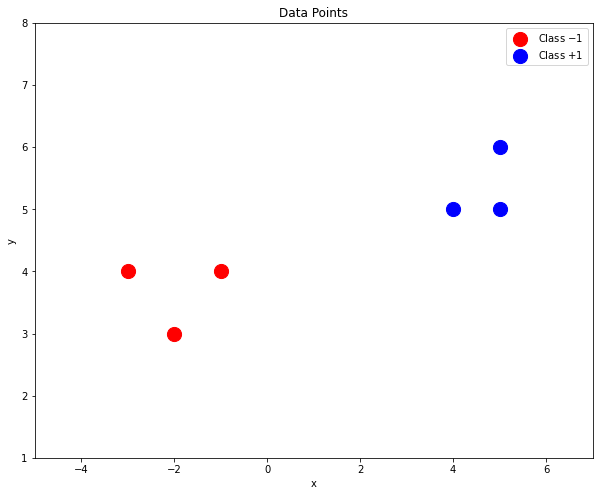

In [14]:
# create figure
fig_data_plot, ax = plt.subplots(1, figsize = (10, 8))

# plot
data_plot(c1x, c1y, c2x, c2y)

## Finding Support Vectors

Now, let's figure out which data points can be our support vectors. We want to choose two support vectors (1 from each class) such that the distance between them is the shortest. The reason for this is because we want to minimize the amount of data points that lie in our margin. Remember, we're trying to classify the data points into Class $-1$ or Class $+1$, so we want a boundary (a line) that makes this distinction or classification as clear as possible.

It's a bit tedious to calculate the distances from all the points in Class $-1$ to all the points in Class $+1$, so that's why Python comes in handy!

Go ahead and run the following **two (2)** cells to see which two data points should be our support vectors and also the distance between them.

* *As a note, recall that to find the distance between two points, we use the distance formula (derived from Pythagoras' Theorem: $a^2 + b^2 = c^2$): $$distance = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$*

In [15]:
sv1, sv2 = best_support_vectors(c1x, c1y, c2x, c2y)

Shortest distance:  5.0990195135927845
Support Vector for class -1:  (-1.0, 4.0)
Support Vector for class +1:  (4.0, 5.0)


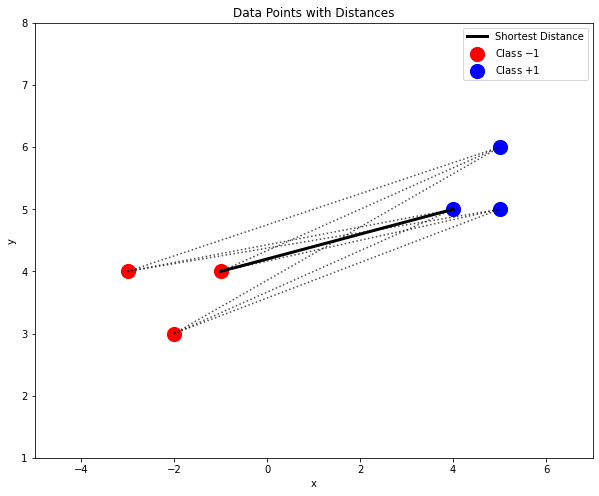

In [16]:
# create figure
fig_distances, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

Cool! So, we see that $(-1, 4)$ is our support vector for Class $-1$, and we also see that $(4, 5)$ is our support vector for Class $+1$. These two data points are stored in variables `sv1` and `sv2`, respectively. We'll be utilizing `sv1` and `sv2` a lot since they are our support (*haha*)!

## Optimal Decision Boundary Line

Now that we have our two support vectors and a visual of the line that connects them, let's do some math to dig deeper into how we can find our **optimal decision boundary line** (the best line that hopefully makes the clearest distinction between the two classes).

Recall that for our decision boundary line, it is in the standard form: $$ax + by = c,$$ where $a$, $b$, and $c$ are real ($\mathbb{R}$) constant numbers, and $x$ and $y$ are variables. In order to find this line, we want to find the values of $a$, $b$, and $c$.

Also recall that the placement of this boundary line should maximize the margin between one support vector from the other. In order for this maximization to happen, we want two things:

1. the line should lie right in the **middle** between both support vectors

    * if the line **doesn't** lie right in the middle, then it's closer to one support vector than the other, which could lead to mis-classification
    
2. the line should be perpendicular to the line you see in the above plot (the shortest distance line)

    * if the line **isn't** perpendicular, then again, it's favoring one support vector over the other, potentially leading to mis-classification
    
Keep these two things in mind! Being in the **middle** and being **perpendicular**.

Let's start with the more challenging concept, which is being **perpendicular**.

### Perpendicular

Right now, we only have our two support vectors $A = (-1, 4)$ and $E = (4, 5)$. Not a lot of stuff to work with, but just enough! From these two points, let's calculate the slope of the line that connects them:

$$\text{slope} = \frac{\Delta y}{\Delta x} =  \frac{y_2 - y_1}{x_2 - x_1}  = \frac{5 - 4}{4 - (-1)} = \frac{1}{5} = 0.2$$

Since we have the slope of the line that connects the two support vectors, we can calculate the slope of our decision boundary line! Recall that if two lines are perpendicular to each other, then their slopes are **opposite reciprocals** of each other. Thus, if the slope of the line connecting the support vectors is $\frac{1}{5}$, then the slope of our decision boundary line is $-\frac{5}{1} = -5$.

Great! So we have the slope of our decision boundary line and we have the general form of our line: $ax + by = c$. How can we put these two together? Take a few moments to think about it, and then come back.

---

Okay! Welcome back, hopefully you made this connection:

$ax + by = c$ is standard form. We have slope, so let's change standard form into slope-intercept form by isolating $y$ on one side:

$$ ax + by = c$$ $$by = -ax + c$$ $$ y = -\frac{a}{b}x + \frac{c}{b}$$

So, $-\frac{a}{b}$ is our slope and $\frac{c}{b}$ is our intercept! We know our slope, so let's set them equal to each other:

$$-\frac{a}{b} = -\frac{5}{1} \longrightarrow \frac{a}{b} = \frac{5}{1}$$
$$\implies a = 5 \text{ and } b = 1$$

* *Side note: this is where we get $a = 5b$ from Wolfram Alpha's multivariable maximum calculator!*

Phew! That was a quite a bit of math. Let's go to Python for a quick break. The following cell calculates $a$ and $b$ exactly how we did it!

In [17]:
a, b = find_a_and_b(sv1, sv2)

Slope of line connecting support vectors:  0.2
Slope of decision boundary line:  -5.0
a:  5.0
b:  1.0


So we know $a$ and $b$. Now, we just need to find $c$! Onto our next criteria, which is being in the **middle**

### Middle

Being in the middle means that the decision boundary line should be equidistant from both support vectors. I'll give you a few moments to think about how we can find the middle between our two support vectors

---

Hopefully the word **middle** got you to think about **midpoint**. That's exactly what we are going to do: find the midpoint of the line connecting our two support vectors.

Recall the midpoint formula: $$\left(\frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2}\right)$$

Remember our two support vectors are: $A = (-1, 4)$ and $E = (4, 5)$.

$$\left(\frac{-1 + 4}{2}, \frac{4 + 5}{2}\right)$$
$$\implies \left(\frac{3}{2}, \frac{9}{2}\right) = \left(1.5, 4.5\right) $$

Let's plot the midpoint to see if it really is sitting on the middle of our line! Go ahead and run the following cell.

Midpoint of the line connecting support vectors: (1.5, 4.5)


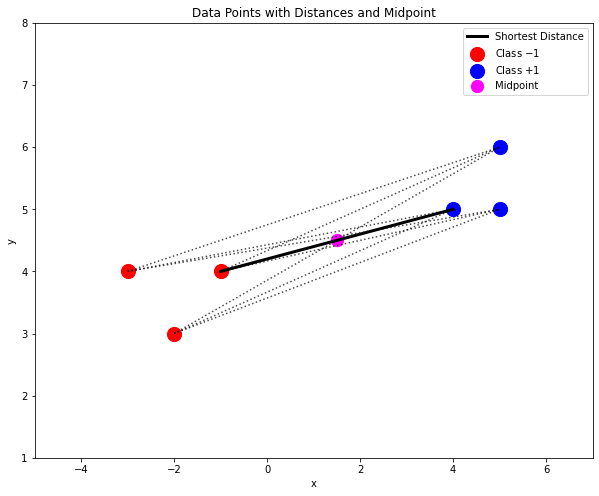

In [18]:
# create figure
fig_distances_midpoint, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

# calculate midpoint
mid_x, mid_y = midpoint(sv1, sv2)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update title and legend with midpoint
ax.set(title = 'Data Points with Distances and Midpoint')
ax.legend()

So, we have values for $a$, $b$, and the midpoint ($(x, y)$ coordinate). We can plug these three key pieces of information into the general form of our decision boundary line to find $c$!

$$ax + by = c \longrightarrow 5x + 1y = c \longrightarrow 5*1.5 + 1*4.5 = c$$
$$\implies c = 12$$

Let's see if Python agrees with us.

In [19]:
c = find_c(a, b, mid_x, mid_y)

Value of c:  12.0


Very nice! So we have successfully found $a$, $b$, and $c$. We now have our optimal decision boundary line:

* $a = 5$
* $b = 1$
* $c = 12$

$$5x + y = 12$$ or if you like slope-intercept form: $$y = -5x + 12$$

Let's plot our hard-earned decision boundary line!

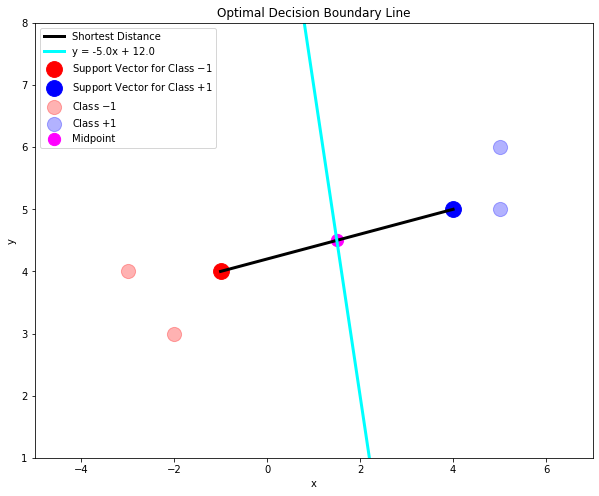

In [20]:
# create figure
fig_optimal, ax = plt.subplots(1, figsize = (10, 8))

# plot
optimal_decision_boundary(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update legend with midpoint
ax.legend()

Think we're done? Not quite!

We still have to find our parallel hyperplanes!

## Parallel Hyperplanes

You might be thinking: "Man, finding one was so hard, I gotta find two more?!"

But don't fret, friend! We can use the power of being **parallel**.

Recall that if a line is parallel to another line, then their slopes are exactly the same! This means that we can keep our values of $a$ and $b$! Nice!

Remember that our parallel hyperplanes must pass through our support vectors. Since our support vectors are just data points (coordinates), we already have our $(x, y)$ coordinates!

That means that all we need to make sure of is:

* The margin should be even on both sides of the decision boundary line. That is, we want our parallel hyperplanes to be **equidistant** from the decision boundary line.

In order to satisfy this, we can vertically translate (shift) our decision boundary line up and down by the same amount. That is, we are varying the $y$-intercept of our line by the same shifting factor. Let's call this shifting factor $f$.

So, we'll have two parallel hyperplanes, one above and one below denoted by:

* Parallel Hyperplane $+f$ (above for Class $+1$): $ax + by = c + f$
* Parallel Hyperplane $-f$ (below for Class $-1$): $ax + by = c - f$

All we need to be careful of is:

* If we're finding Parallel Hyperplane $+f$, we want to use the support vector for Class $+1$
* If we're finding Parallel Hyperplane $-f$, we want to use the support vector for Class $-1$

In solving both, we should get the same $f$ value (since we want to be shifting up and down by an equal amount)!

$a = 5$, $b = 1$, $c = 12$

* Parallel Hyperplane $+f$, $E = (4, 5)$:
$$ax + by = c + f \longrightarrow 5*4 + 1*5 = 12 + f$$
$$\implies f = 13$$

* Parallel Hyperplane $-f$, $A = (-1, 4)$:
$$ax + by = c - f \longrightarrow 5*-1 + 1*4 = 12 - f$$
$$\implies f = 13$$

Let's double check with Python! Run the following two code cells.

In [21]:
f_above = find_f(a, b, c, sv2, Class = 1)

Value of f: 13.0


In [22]:
f_below = find_f(a, b, c, sv1, Class = -1)

Value of f: 13.0


So, our Parallel Hyperplanes are given by the following equations (lines):

* $5x + y = 12 - 13 \longrightarrow 5x + y = -1 \longrightarrow y = -5x -1$
* $5x + y = 12 + 13 \longrightarrow 5x + y = 25 \longrightarrow y = -5x + 25$

Let's put everything together and see our final linear support vector machine!

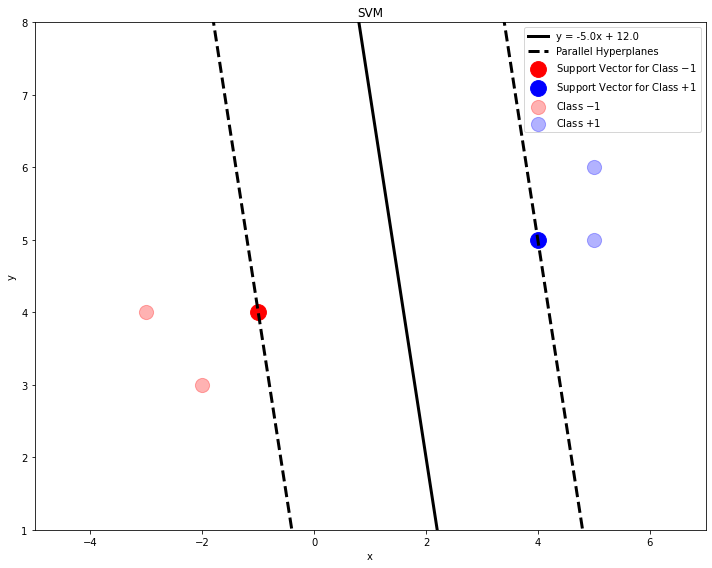

In [23]:
# create figure
fig_svm, ax = plt.subplots(1, figsize = (10, 8))

# plot
svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f_above)

## Practice by Reworking SVM Math 2

Rework the example in SVM Math 2 using the techniques in this notebook!

Here are the data points:

* Class $-1$ : {$(0, 1), (0, 3), (0, 5), (-2, 1), (-2, 3), (-2, 5), (-4, 3)$}
* Class $+1$ : {$(4, 0.5), (5, 5), (7, 5), (9, 5), (6, 7), (8, 7), (8, 9)$}

Recall the steps:

1. Input data `data_input(Class)`
2. Plot data `data_plot(c1x, c1y, c2x, c2y)`
3. Find support vectors `best_support_vectors(c1x, c1y, c2x, c2y)`
4. Plot distances `plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)`
5. Find a and b `find_a_and_b(sv1, sv2)`
6. Find midpoint and plot `midpoint(sv1, sv2)`
7. Find c `find_c(a, b, x, y)`
8. Plot optimal decision boundary line with midpoint `optimal_decision_boundary(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c)`
9. Find f `find_f(a, b, c, sv, Class)`
10. Plot SVM `svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f)`

In [24]:
c1x, c1y = data_input(-1)

Inputting x-coords for class -1 ...
Input x-coord (enter done when finished): 0
Input x-coord (enter done when finished): 0
Input x-coord (enter done when finished): 0
Input x-coord (enter done when finished): -2
Input x-coord (enter done when finished): -2
Input x-coord (enter done when finished): -2
Input x-coord (enter done when finished): -4
Input x-coord (enter done when finished): done

		x-coords:  [0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -4.0] 

Inputting y-coords for class -1 ...
Input y-coord (enter done when finished): 1
Input y-coord (enter done when finished): 3
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 1
Input y-coord (enter done when finished): 3
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 3
Input y-coord (enter done when finished): done

		y-coords:  [1.0, 3.0, 5.0, 1.0, 3.0, 5.0, 3.0] 



In [25]:
c2x, c2y = data_input(1)

Inputting x-coords for class 1 ...
Input x-coord (enter done when finished): 4
Input x-coord (enter done when finished): 5
Input x-coord (enter done when finished): 7
Input x-coord (enter done when finished): 9
Input x-coord (enter done when finished): 6
Input x-coord (enter done when finished): 8
Input x-coord (enter done when finished): 8
Input x-coord (enter done when finished): done

		x-coords:  [4.0, 5.0, 7.0, 9.0, 6.0, 8.0, 8.0] 

Inputting y-coords for class 1 ...
Input y-coord (enter done when finished): 0.5
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 5
Input y-coord (enter done when finished): 7
Input y-coord (enter done when finished): 7
Input y-coord (enter done when finished): 9
Input y-coord (enter done when finished): done

		y-coords:  [0.5, 5.0, 5.0, 5.0, 7.0, 7.0, 9.0] 



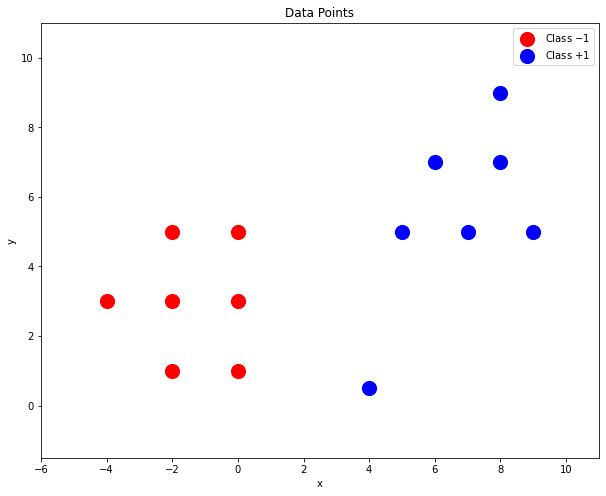

In [26]:
# create figure
fig_data_plot, ax = plt.subplots(1, figsize = (10, 8))

# plot
data_plot(c1x, c1y, c2x, c2y)

In [27]:
sv1, sv2 = best_support_vectors(c1x, c1y, c2x, c2y)

Shortest distance:  4.031128874149275
Support Vector for class -1:  (0.0, 1.0)
Support Vector for class +1:  (4.0, 0.5)


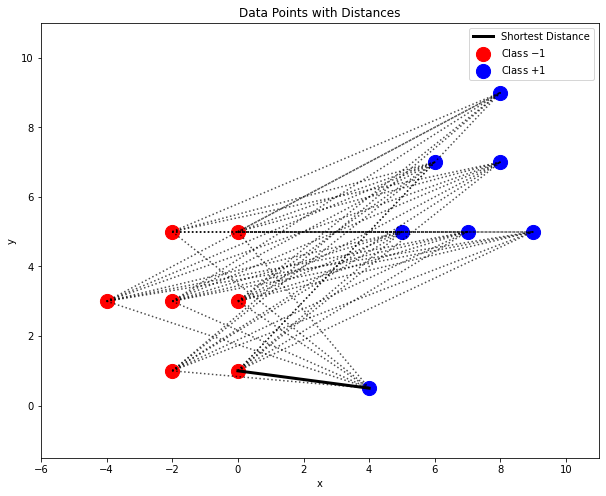

In [28]:
# create figure
fig_distances, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

In [29]:
a, b = find_a_and_b(sv1, sv2)

Slope of line connecting support vectors:  -0.125
Slope of decision boundary line:  8.0
a:  4.0
b:  -0.5


Midpoint of the line connecting support vectors: (2.0, 0.75)


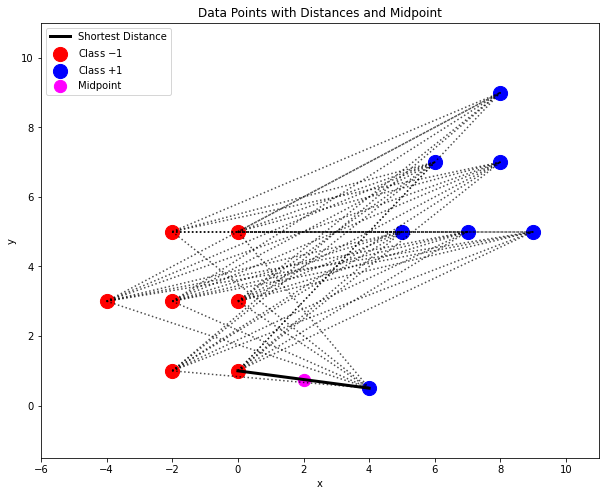

In [30]:
# create figure
fig_distances_midpoint, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

# calculate midpoint
mid_x, mid_y = midpoint(sv1, sv2)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update title and legend with midpoint
ax.set(title = 'Data Points with Distances and Midpoint')
ax.legend()

In [31]:
c = find_c(a, b, mid_x, mid_y)

Value of c:  7.625


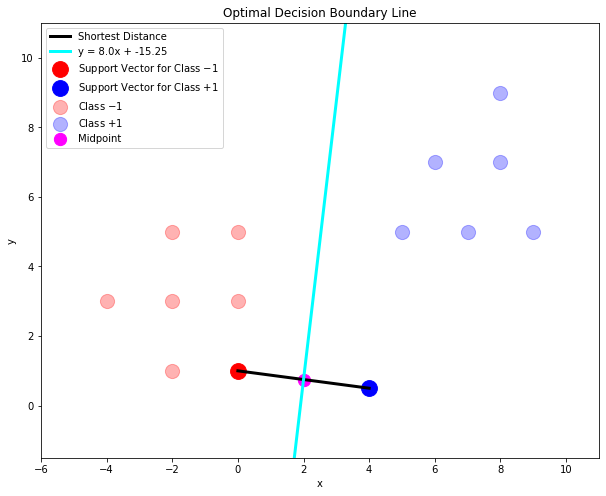

In [32]:
# create figure
fig_optimal, ax = plt.subplots(1, figsize = (10, 8))

# plot
optimal_decision_boundary(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update legend with midpoint
ax.legend()

In [33]:
f_above = find_f(a, b, c, sv2, Class = 1)
f_below = find_f(a, b, c, sv1, Class = -1)

Value of f: 8.125
Value of f: 8.125


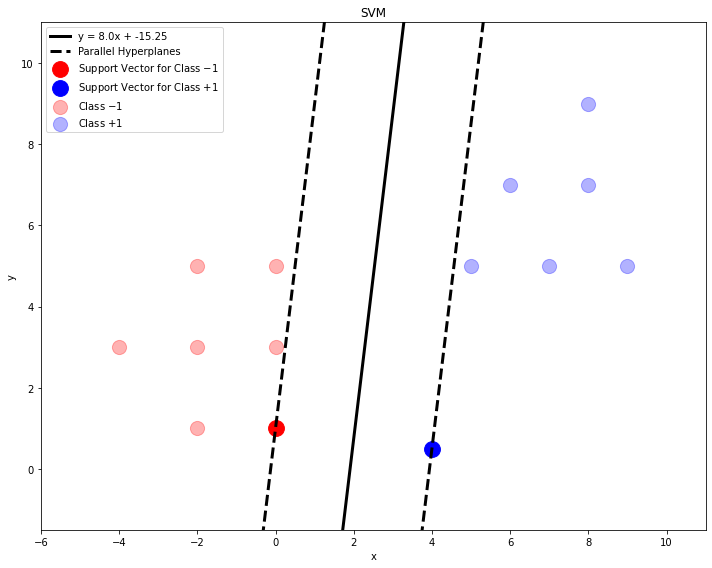

In [34]:
# create figure
fig_svm, ax = plt.subplots(1, figsize = (10, 8))

# plot
svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f_above)

You might be wondering: "this is a great margin since there are no data points inside the margin, but it's not the same as the line in the slides!"

The reason for this is because in the slides, we've chosen different support vectors. We've chosen $(2, 3)$ for Class $-1$ and $(5, 5)$ for Class $+1$. Let's use these two support vectors instead and see what happens.

In [35]:
sv1 = (2, 3)
sv2 = (5, 5)

In [36]:
a, b = find_a_and_b(sv1, sv2)

Slope of line connecting support vectors:  0.6666666666666666
Slope of decision boundary line:  -1.5
a:  3
b:  2


In [37]:
mid_x, mid_y = midpoint(sv1, sv2)

Midpoint of the line connecting support vectors: (3.5, 4.0)


In [38]:
c = find_c(a, b, mid_x, mid_y)

Value of c:  18.5


In [39]:
f_above = find_f(a, b, c, sv2, Class = 1)
f_below = find_f(a, b, c, sv1, Class = -1)

Value of f: 6.5
Value of f: 6.5


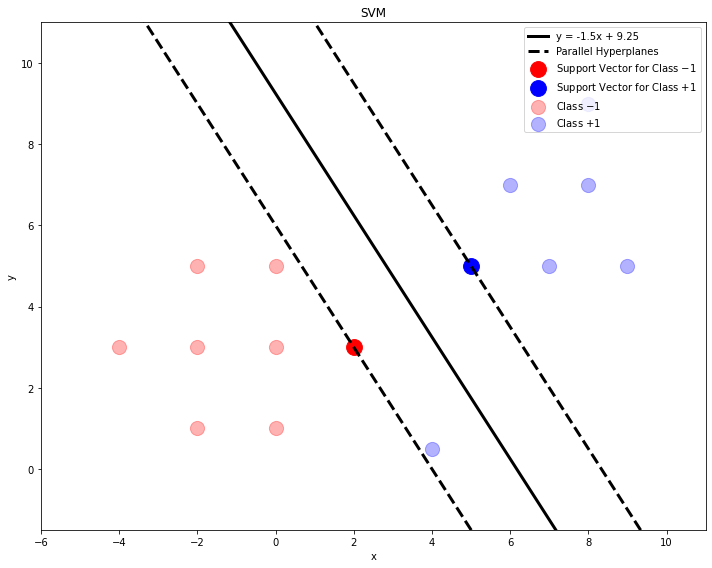

In [40]:
# create figure
fig_svm, ax = plt.subplots(1, figsize = (10, 8))

# plot
svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f_above)

## Bigger Dataset using `data_input_csv`

In [41]:
df = pd.read_csv('data_points.csv')
df

,class,x,y
0,-1,-1,4
1,1,5,6
2,-1,-2,3
3,1,4,5
4,-1,-3,4
5,1,5,5
6,-1,-6,-3
7,-1,-5,0
8,-1,-3,8
9,1,6,7


In [42]:
c1x, c1y = data_input_csv('data_points.csv', -1)
c2x, c2y = data_input_csv('data_points.csv', 1)

x-coords:  [-1, -2, -3, -6, -5, -3]
y-coords:  [4, 3, 4, -3, 0, 8]
x-coords:  [5, 4, 5, 6, 0, 0, 3]
y-coords:  [6, 5, 5, 7, 0, 2, 2]


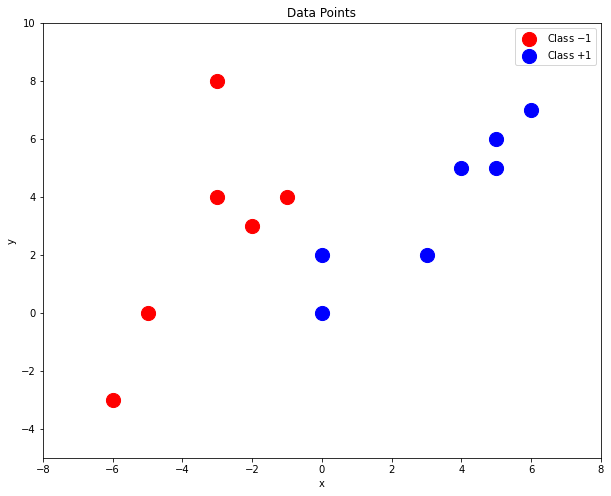

In [43]:
# create figure
fig_data_plot, ax = plt.subplots(1, figsize = (10, 8))

# plot
data_plot(c1x, c1y, c2x, c2y)

In [44]:
sv1, sv2 = best_support_vectors(c1x, c1y, c2x, c2y)

Shortest distance:  2.23606797749979
Support Vector for class -1:  (-1, 4)
Support Vector for class +1:  (0, 2)


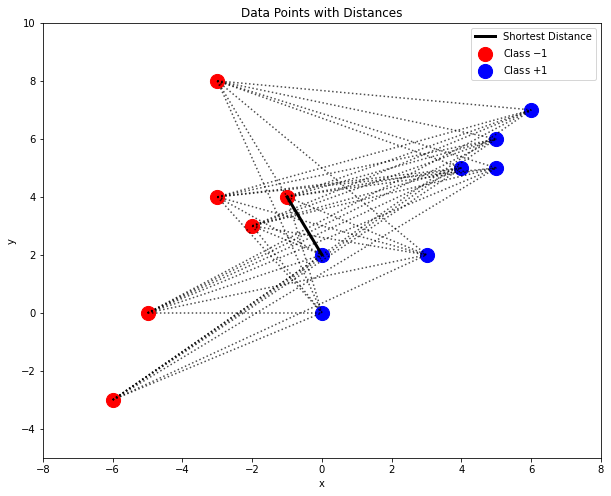

In [45]:
# create figure
fig_distances, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

In [46]:
a, b = find_a_and_b(sv1, sv2)

Slope of line connecting support vectors:  -2.0
Slope of decision boundary line:  0.5
a:  1
b:  -2


Midpoint of the line connecting support vectors: (-0.5, 3.0)


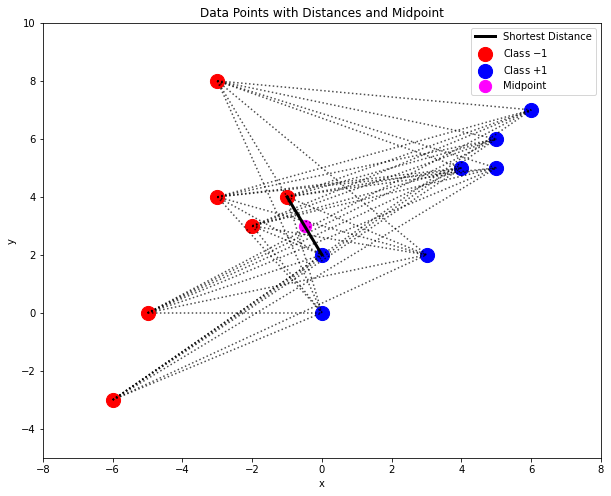

In [47]:
# create figure
fig_distances_midpoint, ax = plt.subplots(1, figsize = (10, 8))

# plot
plot_distances(c1x, c1y, c2x, c2y, sv1, sv2)

# calculate midpoint
mid_x, mid_y = midpoint(sv1, sv2)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update title and legend with midpoint
ax.set(title = 'Data Points with Distances and Midpoint')
ax.legend()

In [48]:
c = find_c(a, b, mid_x, mid_y)

Value of c:  -6.5


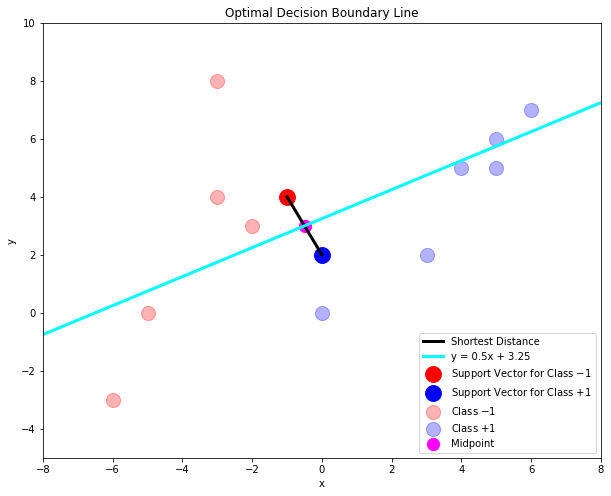

In [49]:
# create figure
fig_optimal, ax = plt.subplots(1, figsize = (10, 8))

# plot
optimal_decision_boundary(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c)

# plot midpoint onto same figure
ax.scatter(mid_x, mid_y, c = 'magenta', s = 150, label = 'Midpoint')

# update legend with midpoint
ax.legend()

In [50]:
f_above = find_f(a, b, c, sv2, Class = 1)

Value of f: 2.5


In [51]:
f_below = find_f(a, b, c, sv1, Class = -1)

Value of f: 2.5


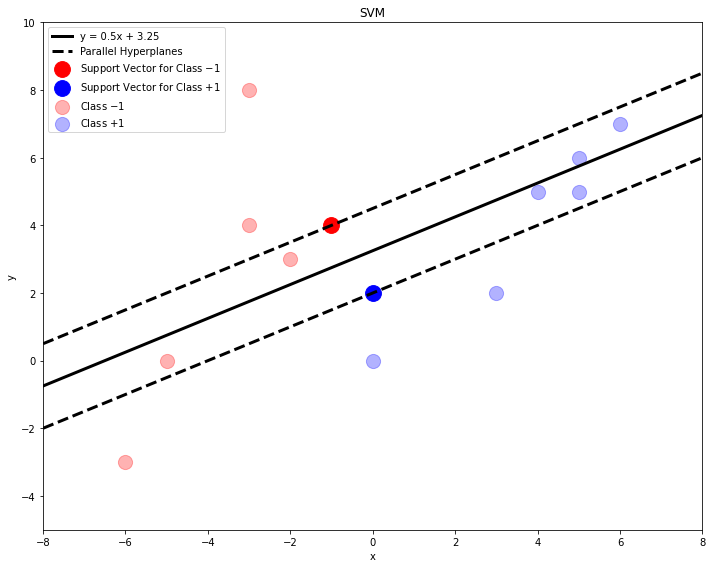

In [52]:
# create figure
fig_svm, ax = plt.subplots(1, figsize = (10, 8))

# plot
svm(c1x, c1y, c2x, c2y, sv1, sv2, a, b, c, f_above)